In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import linregress
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 100)
#pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option("display.precision", 4)

In [3]:
MODEL_DIR = f"trans_single_frame_12_27_hw"

In [4]:
players = pd.read_csv("../2023/data/players.csv")

In [5]:
xt_df = pd.read_csv(f"expected_tackle_df_{MODEL_DIR}.csv", index_col=0)
xt_df.columns = ['max', 'xT', 'tackles', 'diff_xT']
xt_df.index.name='nflId'

In [6]:
merged = pd.merge(xt_df, players, how='left', left_index=True, right_on='nflId').set_index("displayName").drop(columns=['birthDate', 'collegeName'])

''' TACKLES OVER EXPECTED (want larger number) '''
merged['max_x_t'] = merged['tackles'] - merged['max']
merged['avg_x_t'] = merged['tackles'] - merged['xT']
merged['diff_x_t'] = merged['tackles'] - merged['diff_xT']
merged['avg_ratio'] = merged['xT']/merged['tackles']


<Axes: >

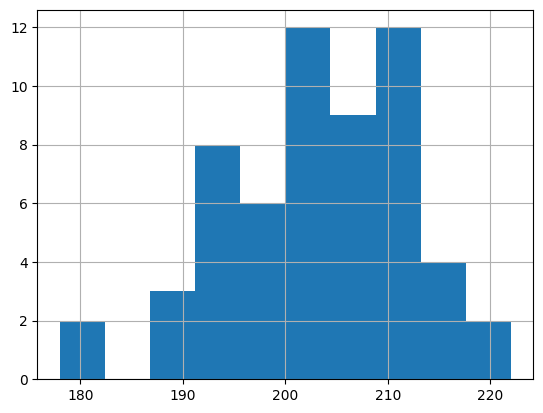

In [7]:
merged.query('officialPosition == "FS"').weight.hist()

In [64]:
merged.head()

,max,xT,tackles,diff_xT,nflId,height,weight,officialPosition,max_x_t,avg_x_t,diff_x_t,avg_ratio
displayName,,,,,,,,,,,,
NaN,1019.5808,545.9480,528.0,-100.4992,-1.0,NaN,NaN,NaN,-491.5808,-17.9480,628.4992,1.0340
Robert Quinn,22.2022,7.1540,3.0,6.9988,37087.0,6-4,257.0,OLB,-19.2022,-4.1540,-3.9988,2.3847
Eddie Jackson,86.0241,40.6448,44.0,-3.6851,44925.0,6-0,202.0,SS,-42.0241,3.3552,47.6851,0.9237
NaN,84.5833,36.8910,35.0,2.5968,45345.0,NaN,NaN,NaN,-49.5833,-1.8910,32.4032,1.0540
Roquan Smith,91.3662,42.4913,50.0,-4.9846,46077.0,6-0,230.0,ILB,-41.3662,7.5087,54.9846,0.8498


In [8]:
pff_summary = pd.read_csv("../pff_data/pff_defense.csv", index_col=0)

In [9]:
pff_summary['total_snaps'] = pff_summary['snap_counts_box'] + pff_summary['snap_counts_corner'] + pff_summary['snap_counts_slot'] + \
            pff_summary['snap_counts_dl']

In [10]:
pff_tackles = pff_summary.loc[:,['team_name','total_snaps', 'missed_tackle_rate', 'grades_tackle', 'grades_pass_rush_defense', 'grades_run_defense', 'stops', 'tackles', 'total_pressures']].dropna(subset=['grades_tackle']).drop_duplicates()

In [11]:
pff_tackles = pff_tackles.sort_values('grades_tackle', ascending=False)
pff_tackles['grades_tackle_percentile'] = ((np.arange(pff_tackles.shape[0]+1, 1, -1)/(pff_tackles.shape[0]+1))*100).astype(int)+1

In [12]:
pff_tackles = pff_tackles.sort_values('missed_tackle_rate', ascending=True)
pff_tackles['missed_tackles_percentile'] = -1

num_players = (pff_tackles.tackles[pff_tackles.tackles >= 5]).shape[0]+1
pff_tackles.loc[pff_tackles.tackles >= 5, 'missed_tackles_percentile'] = ((np.arange(num_players, 1, -1)/num_players)*100).astype(int)+1

In [13]:
all_df = pd.merge(merged, pff_tackles, how='left', left_index=True, right_index=True)

In [14]:
all_df.head()

,max,xT,tackles_x,diff_xT,nflId,height,weight,officialPosition,max_x_t,avg_x_t,diff_x_t,avg_ratio,team_name,total_snaps,missed_tackle_rate,grades_tackle,grades_pass_rush_defense,grades_run_defense,stops,tackles_y,total_pressures,grades_tackle_percentile,missed_tackles_percentile
displayName,,,,,,,,,,,,,,,,,,,,,,,
A'Shawn Robinson,26.1452,8.9436,15.0,-4.7432,43335.0,6-4,330.0,DT,-11.1452,6.0564,19.7432,0.5962,LA,288.0,10.8,51.1,52.6,70.2,16.0,25.0,3.0,33.0,58.0
A.J. Brown,0.0646,0.0099,0.0,0.0055,47834.0,6-0,226.0,WR,-0.0646,-0.0099,-0.0055,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Cann,0.0123,0.0017,0.0,0.0033,42410.0,6-3,325.0,G,-0.0123,-0.0017,-0.0033,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Dillon,0.0844,0.0077,0.0,0.0040,52470.0,6-1,250.0,RB,-0.0844,-0.0077,-0.0040,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A.J. Epenesa,8.6903,2.9970,1.0,2.2426,52462.0,6-5,280.0,DE,-7.6903,-1.9970,-1.2426,2.9970,BUF,187.0,71.4,24.1,70.3,50.2,4.0,2.0,14.0,2.0,-1.0


In [15]:
filtered_df = all_df[all_df.index.notnull() & (all_df.total_snaps >= 55)].copy()
filtered_df = filtered_df[~filtered_df.index.duplicated(keep='first')]

In [16]:
filtered_df.index.name = None

In [17]:
filtered_df['avg_x_t_over_snap'] = filtered_df['avg_x_t']/filtered_df['total_snaps']

In [18]:
filtered_df = filtered_df.sort_values('avg_x_t', ascending=False)
filtered_df['xT_rank'] =  np.arange(1, filtered_df.shape[0]+1)

filtered_df = filtered_df.sort_values('avg_x_t_over_snap', ascending=False)
filtered_df['xT_per_snap_rank'] =  np.arange(1, filtered_df.shape[0]+1)

In [19]:
#"%.3f"


In [20]:
filtered_df['missed_tackles_percentile'] = filtered_df['missed_tackles_percentile'].astype(int)
filtered_df['grades_tackle_percentile'] = filtered_df['grades_tackle_percentile'].astype(int)
filtered_df['total_snaps'] = filtered_df['total_snaps'].astype(int)

#filtered_df['avg_x_t'] = round(filtered_df['avg_x_t'], 4)
#filtered_df['avg_x_t_over_snap'] = round(filtered_df['avg_x_t_over_snap'], 4)

In [78]:
filtered_df.query("officialPosition == 'SS'").sort_values("avg_x_t", ascending=False).iloc[0:10]

,max,xT,tackles_x,diff_xT,nflId,height,weight,officialPosition,max_x_t,avg_x_t,diff_x_t,avg_ratio,total_snaps,missed_tackle_rate,grades_tackle,grades_pass_rush_defense,grades_run_defense,stops,tackles_y,total_pressures,grades_tackle_percentile,missed_tackles_percentile,avg_x_t_over_snap,xT_rank,xT_per_snap_rank
displayName,,,,,,,,,,,,,,,,,,,,,,,,,
Donovan Wilson,70.8156,33.6248,37.0,-5.4115,47996.0,6-0,204.0,SS,-33.8156,3.3752,42.4115,0.9088,323,20.9,43.1,90.0,46.1,21.0,44.0,9.0,25,14,0.0104,71,84
Eddie Jackson,86.0241,40.6448,44.0,-3.6851,44925.0,6-0,202.0,SS,-42.0241,3.3552,47.6851,0.9237,167,13.0,71.1,55.6,72.1,7.0,57.0,0.0,72,43,0.0201,72,28
Jabrill Peppers,28.0766,12.8978,16.0,-2.3307,44837.0,5-11,213.0,SS,-12.0766,3.1022,18.3307,0.8061,183,3.3,79.8,64.8,72.1,13.0,23.0,0.0,94,87,0.0170,76,40
Budda Baker,89.5823,38.8419,41.0,-12.3822,44848.0,5-10,195.0,SS,-48.5823,2.1581,53.3822,0.9474,339,13.6,62.7,67.5,87.4,14.0,53.0,7.0,54,39,0.0064,106,130
Ronnie Harrison,12.0509,4.8768,7.0,-0.1831,46162.0,6-3,214.0,SS,-5.0509,2.1232,7.1831,0.6967,112,20.0,34.1,62.8,53.0,2.0,7.0,1.0,14,16,0.0190,109,32
Will Harris,27.5616,14.0549,16.0,-0.8166,47864.0,6-1,207.0,SS,-11.5616,1.9451,16.8166,0.8784,212,12.5,67.0,63.8,53.2,7.0,16.0,1.0,61,45,0.0092,116,100
Eric Rowe,33.0728,19.3535,21.0,0.0973,42390.0,6-1,205.0,SS,-12.0728,1.6465,20.9027,0.9216,180,12.5,55.7,59.3,78.4,7.0,22.0,0.0,41,48,0.0091,131,101
Geno Stone,36.7307,19.1079,20.0,-1.3175,52627.0,5-11,210.0,SS,-16.7307,0.8921,21.3175,0.9554,96,8.3,79.1,66.3,62.7,4.0,21.0,2.0,92,69,0.0093,164,97
Chuck Clark,74.0172,34.1705,35.0,4.1423,44999.0,6-0,205.0,SS,-39.0172,0.8295,30.8577,0.9763,336,10.5,71.3,62.5,70.6,13.0,38.0,3.0,72,59,0.0025,171,192


In [75]:
filtered_df.query("officialPosition == 'DT'").sort_values("avg_x_t", ascending=False).iloc[0:10]

,max,xT,tackles_x,diff_xT,nflId,height,weight,officialPosition,max_x_t,avg_x_t,diff_x_t,avg_ratio,total_snaps,missed_tackle_rate,grades_tackle,grades_pass_rush_defense,grades_run_defense,stops,tackles_y,total_pressures,grades_tackle_percentile,missed_tackles_percentile,avg_x_t_over_snap,xT_rank,xT_per_snap_rank
displayName,,,,,,,,,,,,,,,,,,,,,,,,,
Grover Stewart,50.3715,17.3704,31.0,-3.0124,44957.0,6-4,315.0,DT,-19.3715,13.6296,34.0124,0.5603,385,6.0,61.9,59.1,75.0,26.0,38.0,8.0,52,80,0.0354,3,6
Christian Wilkins,36.3845,12.0520,22.0,-0.9479,47796.0,6-4,315.0,DT,-14.3845,9.9480,22.9479,0.5478,476,4.4,66.9,71.1,71.3,21.0,29.0,10.0,61,85,0.0209,7,26
Javon Hargrave,23.9699,8.1330,15.0,-2.0317,43378.0,6-2,305.0,DT,-8.9699,6.8670,17.0317,0.5422,331,13.0,49.7,87.8,51.2,17.0,18.0,29.0,32,43,0.0207,17,27
A'Shawn Robinson,26.1452,8.9436,15.0,-4.7432,43335.0,6-4,330.0,DT,-11.1452,6.0564,19.7432,0.5962,288,10.8,51.1,52.6,70.2,16.0,25.0,3.0,33,58,0.0210,22,25
Broderick Washington,18.0154,6.0094,12.0,-0.6636,52578.0,6-3,305.0,DT,-6.0154,5.9906,12.6636,0.5008,254,14.3,43.4,66.6,58.2,10.0,18.0,10.0,25,38,0.0236,23,19
Derrick Brown,33.5066,12.0192,18.0,-2.0453,52415.0,6-5,318.0,DT,-15.5066,5.9808,20.0453,0.6677,432,4.9,65.4,75.9,82.5,18.0,24.0,20.0,59,84,0.0138,24,57
Khalen Saunders,18.8080,7.1517,13.0,-2.9372,47867.0,6-0,324.0,DT,-5.8080,5.8483,15.9372,0.5501,184,3.4,68.8,55.4,61.1,12.0,18.0,8.0,65,87,0.0318,26,9
Jonathan Allen,33.7015,11.9693,17.0,-0.8879,44829.0,6-3,300.0,DT,-16.7015,5.0307,17.8879,0.7041,476,9.7,56.1,84.7,60.2,28.0,24.0,32.0,42,63,0.0106,31,82
Cameron Heyward,28.5691,10.2786,15.0,-1.9759,37104.0,6-5,295.0,DT,-13.5691,4.7214,16.9759,0.6852,393,3.4,70.5,68.7,80.7,18.0,20.0,21.0,70,87,0.0120,37,72


In [72]:
filtered_df.query("officialPosition == 'CB'").sort_values("avg_x_t", ascending=False).iloc[0:10]

,max,xT,tackles_x,diff_xT,nflId,height,weight,officialPosition,max_x_t,avg_x_t,diff_x_t,avg_ratio,total_snaps,missed_tackle_rate,grades_tackle,grades_pass_rush_defense,grades_run_defense,stops,tackles_y,total_pressures,grades_tackle_percentile,missed_tackles_percentile,avg_x_t_over_snap,xT_rank,xT_per_snap_rank
displayName,,,,,,,,,,,,,,,,,,,,,,,,,
Jeff Okudah,53.9768,25.8632,36.0,-1.8446,52411.0,6-1,200.0,CB,-17.9768,10.1368,37.8446,0.7184,507,2.0,87.2,NaN,81.9,14.0,44.0,0.0,99,89,0.0200,6,30
L'Jarius Sneed,62.4158,31.6490,39.0,-2.2524,52546.0,6-1,193.0,CB,-23.4158,7.3510,41.2524,0.8115,521,11.7,67.4,90.1,72.4,19.0,49.0,10.0,62,53,0.0141,16,54
Charvarius Ward,36.9890,18.2589,25.0,-2.5668,46757.0,6-1,195.0,CB,-11.9890,6.7411,27.5668,0.7304,451,0.0,90.1,77.0,92.0,9.0,33.0,0.0,100,94,0.0149,19,48
Fabian Moreau,33.0457,16.6391,22.0,-3.7658,44893.0,6-0,204.0,CB,-11.0457,5.3609,25.7658,0.7563,333,9.4,68.5,NaN,65.6,6.0,25.0,0.0,65,64,0.0161,29,42
Mike Hilton,41.4927,20.1855,25.0,-3.9873,43641.0,5-9,184.0,CB,-16.4927,4.8145,28.9873,0.8074,385,14.6,61.0,65.0,74.9,13.0,31.0,4.0,51,35,0.0125,36,64
Cameron Dantzler,60.7420,34.6606,39.0,0.4709,52497.0,6-2,185.0,CB,-21.7420,4.3394,38.5291,0.8887,463,8.9,71.4,NaN,65.0,16.0,40.0,0.0,72,67,0.0094,46,95
Nate Hobbs,40.0424,20.7501,25.0,-3.7417,53596.0,6-0,195.0,CB,-15.0424,4.2499,28.7417,0.8300,306,10.3,69.2,78.2,83.0,12.0,27.0,1.0,66,60,0.0139,49,55
Taron Johnson,60.4683,28.8128,33.0,-0.8485,46190.0,5-11,192.0,CB,-27.4683,4.1872,33.8485,0.8731,459,11.5,59.7,66.0,58.8,18.0,36.0,1.0,49,54,0.0091,52,102
Chidobe Awuzie,45.3396,24.1028,28.0,2.6859,44872.0,6-0,202.0,CB,-17.3396,3.8972,25.3141,0.8608,469,12.8,61.3,NaN,48.7,7.0,31.0,0.0,51,44,0.0083,60,109


In [73]:
filtered_df.query("officialPosition == 'CB'").sort_values("xT", ascending=False).iloc[0:10]

,max,xT,tackles_x,diff_xT,nflId,height,weight,officialPosition,max_x_t,avg_x_t,diff_x_t,avg_ratio,total_snaps,missed_tackle_rate,grades_tackle,grades_pass_rush_defense,grades_run_defense,stops,tackles_y,total_pressures,grades_tackle_percentile,missed_tackles_percentile,avg_x_t_over_snap,xT_rank,xT_per_snap_rank
displayName,,,,,,,,,,,,,,,,,,,,,,,,,
Cameron Dantzler,60.7420,34.6606,39.0,0.4709,52497.0,6-2,185.0,CB,-21.7420,4.3394,38.5291,0.8887,463,8.9,71.4,NaN,65.0,16.0,40.0,0.0,72,67,0.0094,46,95
Marco Wilson,65.0504,32.5160,24.0,8.2762,53565.0,5-11,191.0,CB,-41.0504,-8.5160,15.7238,1.3548,545,15.6,46.4,57.5,27.4,7.0,34.0,3.0,28,32,-0.0156,467,426
D.J. Reed,59.0138,32.2835,33.0,-1.4071,46211.0,5-9,188.0,CB,-26.0138,0.7165,34.4071,0.9783,613,12.2,57.7,56.6,60.0,13.0,39.0,0.0,44,50,0.0012,180,215
L'Jarius Sneed,62.4158,31.6490,39.0,-2.2524,52546.0,6-1,193.0,CB,-23.4158,7.3510,41.2524,0.8115,521,11.7,67.4,90.1,72.4,19.0,49.0,10.0,62,53,0.0141,16,54
Anthony Brown,54.4401,29.4989,24.0,6.3663,43478.0,5-11,196.0,CB,-30.4401,-5.4989,17.6337,1.2291,543,23.1,35.1,NaN,50.6,6.0,25.0,0.0,16,9,-0.0101,446,391
Tyson Campbell,57.0738,28.9331,30.0,-2.4942,53462.0,6-2,185.0,CB,-27.0738,1.0669,32.4942,0.9644,602,10.9,54.9,NaN,69.6,12.0,35.0,0.0,39,58,0.0018,153,206
Taron Johnson,60.4683,28.8128,33.0,-0.8485,46190.0,5-11,192.0,CB,-27.4683,4.1872,33.8485,0.8731,459,11.5,59.7,66.0,58.8,18.0,36.0,1.0,49,54,0.0091,52,102
Stephon Gilmore,55.7464,28.6711,27.0,8.0777,38540.0,6-1,202.0,CB,-28.7464,-1.6711,18.9223,1.0619,567,10.8,60.8,NaN,73.1,8.0,33.0,0.0,50,58,-0.0029,352,288
Bobby McCain,56.8812,28.0808,27.0,-0.9187,42488.0,5-11,192.0,CB,-29.8812,-1.0808,27.9187,1.0400,239,15.7,53.3,62.3,48.7,9.0,33.0,1.0,37,31,-0.0045,315,314


In [60]:
filtered_df.sort_values("xT", ascending=False).iloc[0:20]

,max,xT,tackles_x,diff_xT,nflId,height,weight,officialPosition,max_x_t,avg_x_t,diff_x_t,avg_ratio,total_snaps,missed_tackle_rate,grades_tackle,grades_pass_rush_defense,grades_run_defense,stops,tackles_y,total_pressures,grades_tackle_percentile,missed_tackles_percentile,avg_x_t_over_snap,xT_rank,xT_per_snap_rank
displayName,,,,,,,,,,,,,,,,,,,,,,,,,
Zaire Franklin,104.8241,47.9491,53.0,-6.0754,46304.0,6-0,236.0,OLB,-51.8241,5.0509,59.0754,0.9047,572,13.3,55.3,67.4,69.2,29.0,64.0,4.0,40,41,8.8303e-03,30,105
C.J. Mosley,99.1532,46.7971,51.0,3.4608,41243.0,6-2,250.0,ILB,-48.1532,4.2029,47.5392,0.9176,601,8.2,69.4,56.6,65.1,24.0,61.0,2.0,67,71,6.9931e-03,51,127
Jordyn Brooks,99.7294,46.3969,61.0,-5.6026,52435.0,6-1,245.0,OLB,-38.7294,14.6031,66.6026,0.7606,611,11.8,58.4,63.4,69.9,35.0,65.0,5.0,46,53,2.3900e-02,2,18
Foyesade Oluokun,91.8916,43.3101,59.0,-3.5211,46269.0,6-2,215.0,ILB,-32.8916,15.6899,62.5211,0.7341,603,10.9,61.8,74.0,54.6,40.0,73.0,9.0,52,58,2.6020e-02,1,15
Roquan Smith,91.3662,42.4913,50.0,-4.9846,46077.0,6-0,230.0,ILB,-41.3662,7.5087,54.9846,0.8498,542,7.4,79.1,58.0,64.6,34.0,62.0,7.0,92,74,1.3854e-02,14,56
Eddie Jackson,86.0241,40.6448,44.0,-3.6851,44925.0,6-0,202.0,SS,-42.0241,3.3552,47.6851,0.9237,167,13.0,71.1,55.6,72.1,7.0,57.0,0.0,72,43,2.0091e-02,72,28
Andre Cisco,82.9343,40.3530,31.0,-6.2819,53494.0,6-0,203.0,SS,-51.9343,-9.3530,37.2819,1.3017,140,12.5,65.4,61.2,47.6,4.0,32.0,0.0,59,45,-6.6807e-02,471,470
Rashaan Evans,85.9267,40.1667,43.0,-1.0893,46091.0,6-2,234.0,ILB,-42.9267,2.8333,44.0893,0.9341,604,6.9,78.6,68.7,65.4,23.0,55.0,4.0,92,77,4.6910e-03,82,152
Bobby Okereke,85.4939,40.1521,47.0,-5.2326,47872.0,6-1,234.0,MLB,-38.4939,6.8479,52.2326,0.8543,479,5.0,81.3,48.1,86.6,29.0,58.0,0.0,96,83,1.4296e-02,18,52


In [61]:
corr_df = filtered_df.dropna()

In [71]:
np.corrcoef(corr_df.xT, corr_df.avg_x_t)

array([[1.        , 0.04744744],
       [0.04744744, 1.        ]])

In [63]:
np.cov(corr_df.avg_x_t, corr_df.missed_tackle_rate)

array([[124.33398291, -14.55197541],
       [-14.55197541, 106.25134225]])

In [67]:
np.corrcoef(corr_df.avg_x_t.values, corr_df.missed_tackle_rate.values)

array([[ 1.        , -0.18378808],
       [-0.18378808,  1.        ]])

In [70]:
np.corrcoef(corr_df.avg_x_t.values, corr_df.grades_tackle.values)

array([[1.        , 0.15378764],
       [0.15378764, 1.        ]])

In [69]:
np.corrcoef(corr_df.grades_tackle.values, corr_df.missed_tackle_rate.values)

array([[ 1.        , -0.76351563],
       [-0.76351563,  1.        ]])

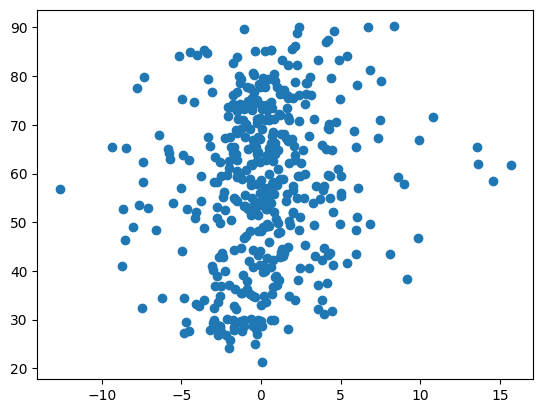

In [72]:
plt.scatter(corr_df.avg_x_t.values, corr_df.grades_tackle.values)

In [21]:
xT_df = filtered_df.loc[:,['officialPosition', 'xT_rank', 'avg_x_t', 'missed_tackles_percentile', 'grades_tackle_percentile', 'total_snaps']]
xT_df.columns = ['Position', 'xT Rank','xT', 'MIS Percentile', 'Tackle Grades Percentile', 'Total Snaps']

xT_per_snap_df = filtered_df.loc[:,['officialPosition', 'xT_per_snap_rank', 'avg_x_t_over_snap', 'missed_tackles_percentile', 'grades_tackle_percentile', 'total_snaps']]
xT_per_snap_df.columns = ['Position', 'xT/snap Rank', 'xT/snap', 'MIS Percentile', 'Tackle Grades Percentile', 'Total Snaps']

In [34]:
output_df = filtered_df.loc[:,['officialPosition', 'team_name', 'xT_rank', 'avg_x_t', 'avg_x_t_over_snap', 'total_snaps']]
output_df.columns = ['Position', 'Team', 'xT Rank','xT', 'xT/snap', 'Total Snaps']
output_df = output_df.reset_index(names='name')
output_df.to_csv("output_data/player_rankings.csv")

In [35]:
output_df.head()

,name,Position,Team,xT Rank,xT,xT/snap,Total Snaps
0,Denzel Perryman,ILB,LV,8,9.8834,0.0451,219
1,Isaac Rochell,DE,CLV,25,5.9361,0.0440,135
2,Blake Martinez,ILB,LV,56,4.0746,0.0388,105
3,Tre Flowers,CB,CIN,67,3.5805,0.0377,95
4,T.J. Watt,OLB,PIT,97,2.3760,0.0360,66


In [22]:
xT_per_snap_df.dtypes

Position                     object
xT/snap Rank                  int64
xT/snap                     float64
MIS Percentile                int64
Tackle Grades Percentile      int64
Total Snaps                   int64
dtype: object

In [23]:
#filtered_df.style.applymap(lambda x: "background-color: white")
#filtered_df.style.text_gradient(cmap='Greens')
html_table_xt_per_snap = xT_per_snap_df.sort_values('xT/snap', ascending=False).round(4).style \
.set_properties(**{'background-color': 'white', 'color': 'black'}) \
.background_gradient(subset=['xT/snap', 'MIS Percentile', 'Tackle Grades Percentile']).format(precision=4) \
.to_html()


In [24]:
html_table_xt = xT_df.sort_values('xT', ascending=False).round(4).style \
.set_properties(**{'background-color': 'white', 'color': 'black'}) \
.background_gradient(subset=['xT', 'MIS Percentile', 'Tackle Grades Percentile']).format(precision=4) \
.to_html()

In [55]:
linebacker_list = ['SS', 'FS']
xT_df.query("Position in @linebacker_list").sort_values('xT', ascending=False).reset_index().round(4).style \
.background_gradient(subset=['xT', 'MIS Percentile', 'Tackle Grades Percentile']).format(precision=4)

,index,Position,xT Rank,xT,MIS Percentile,Tackle Grades Percentile,Total Snaps
0,DeShon Elliott,FS,21,6.0613,76,90,250
1,Kamren Curl,FS,55,4.1143,89,99,339
2,Donovan Wilson,SS,71,3.3752,14,25,323
3,Eddie Jackson,SS,72,3.3552,43,72,167
4,Jabrill Peppers,SS,76,3.1022,87,94,183
5,Jalen Thompson,FS,103,2.2709,87,100,278
6,Budda Baker,SS,106,2.1581,39,54,339
7,Malik Hooker,FS,107,2.1479,84,99,68
8,Jayron Kearse,FS,108,2.1425,80,92,220
9,Ronnie Harrison,SS,109,2.1232,16,14,112


In [45]:
46/132

0.3484848484848485

In [52]:
120/xT_df.shape[0]

0.2536997885835095

In [53]:
xT_df.shape

(473, 6)

In [26]:
xT_df.sort_values('xT', ascending=False).round(4).style \
.background_gradient(subset=['xT', 'MIS Percentile', 'Tackle Grades Percentile']).format(precision=4)

# .set_properties(**{'background-color': 'white', 'color': 'black'}) \

,Position,xT Rank,xT,MIS Percentile,Tackle Grades Percentile,Total Snaps
Foyesade Oluokun,ILB,1,15.6899,58,52,603
Jordyn Brooks,OLB,2,14.6031,53,46,611
Grover Stewart,DT,3,13.6296,80,52,385
Pete Werner,OLB,4,13.5433,68,59,487
Jordan Hicks,ILB,5,10.8033,72,73,482
Jeff Okudah,CB,6,10.1368,89,99,507
Christian Wilkins,DT,7,9.9480,85,61,476
Denzel Perryman,ILB,8,9.8834,31,28,219
Maxx Crosby,DE,9,9.1815,26,20,501
Alex Singleton,OLB,10,8.9559,61,44,326


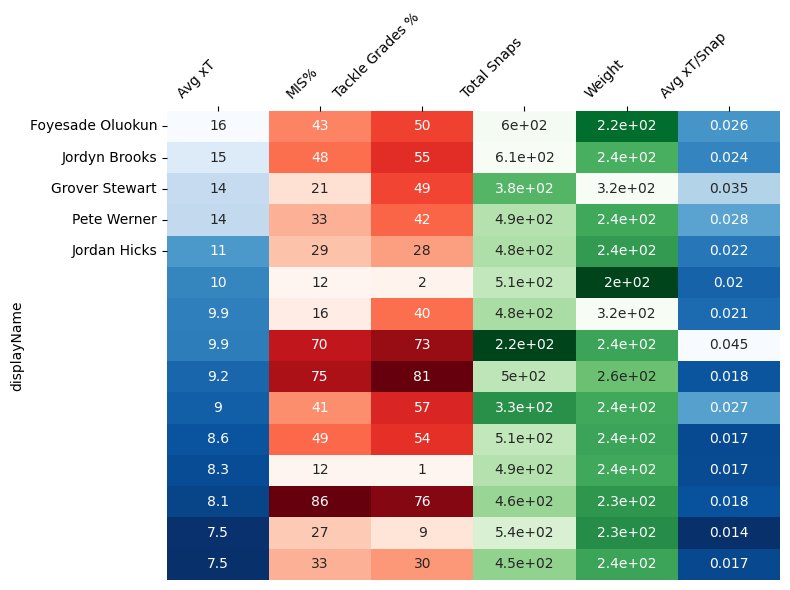

In [134]:
fig, axis = plt.subplots(figsize=(8,6))

col_list = ['avg_x_t', 'missed_tackles_percentile', 'grades_tackle_percentile', 'total_snaps', 'weight', 'avg_x_t_over_snap']
col_display_names = ['Avg xT', 'MIS%', 'Tackle Grades %', 'Total Snaps', 'Weight', 'Avg xT/Snap']

df = top_15_avg_xt.loc[:,col_list].copy()
color_list = ['Blues_r', 'Reds', 'Reds', 'Greens_r', 'Greens_r', 'Blues_r']

for index, col in enumerate(col_list):
    mask = np.repeat(~df.columns.isin([col]).reshape(1,-1), repeats=15,axis=0)
    sns.heatmap(df, mask=mask, annot=True, cmap=color_list[index],
                yticklabels=df.index,
                cbar=False, ax=axis)
axis.set_xticklabels(labels=col_display_names, rotation=45, ha='right')
axis.xaxis.tick_top()

axis.set(yticks=axis.get_yticks()[0:5], yticklabels=df.index[0:5])

plt.tight_layout()
plt.show()

In [27]:
# top_15_avg_xt_over_snap.to_csv("report_data/top_15_xt_over_snap.csv")
# top_15_avg_xt.to_csv("report_data/top_15_xt.csv")

In [54]:
filtered_df.query("officialPosition == 'DE'").sort_values('avg_x_t_over_snap', ascending=False).iloc[0:15]

,max,xT,tackles_x,diff_xT,nflId,height,weight,officialPosition,max_x_t,avg_x_t,diff_x_t,avg_ratio,total_snaps,missed_tackle_rate,grades_tackle,grades_pass_rush_defense,grades_run_defense,stops,tackles_y,total_pressures,grades_tackle_percentile,missed_tackles_percentile,avg_x_t_over_snap
displayName,,,,,,,,,,,,,,,,,,,,,,,
Isaac Rochell,14.636,5.064,11.000,-3.132,45038.000,6-4,280.000,DE,-3.636,5.936,14.132,0.460,135.000,13.300,48.400,52.000,44.600,6.000,12.000,6.000,71.000,59.000,0.044
Shaka Toney,4.046,1.338,3.000,-2.343,53675.000,6-3,252.000,DE,-1.046,1.662,5.343,0.446,51.000,0.000,73.400,56.500,74.800,3.000,3.000,2.000,23.000,0.000,0.033
Carl Granderson,11.586,3.576,8.000,0.295,48537.000,6-5,261.000,DE,-3.586,4.424,7.705,0.447,153.000,0.000,79.700,60.100,79.700,9.000,13.000,3.000,8.000,9.000,0.029
Rasheem Green,23.306,7.930,14.000,4.019,46148.000,6-4,279.000,DE,-9.306,6.070,9.981,0.566,276.000,10.500,57.100,59.100,56.200,11.000,15.000,15.000,58.000,42.000,0.022
D.J. Wonnum,18.505,6.521,11.000,-1.374,52525.000,6-5,260.000,DE,-7.505,4.479,12.374,0.593,225.000,11.800,64.800,60.000,66.800,8.000,11.000,20.000,44.000,49.000,0.020
Maxx Crosby,43.653,16.818,26.000,-1.124,47889.000,6-5,255.000,DE,-17.653,9.182,27.124,0.647,501.000,17.000,38.300,80.200,88.900,34.000,33.000,32.000,81.000,75.000,0.018
Tanoh Kpassagnon,13.553,4.573,7.000,-0.862,44871.000,6-7,289.000,DE,-6.553,2.427,7.862,0.653,156.000,6.700,59.400,50.900,52.900,4.000,13.000,5.000,53.000,24.000,0.016
Josh Sweat,28.169,9.979,15.000,1.753,46199.000,6-5,253.000,DE,-13.169,5.021,13.247,0.665,328.000,19.200,59.500,68.700,79.500,16.000,19.000,26.000,53.000,82.000,0.015
Kwity Paye,23.127,9.019,13.000,-3.350,53450.000,6-3,265.000,DE,-10.127,3.981,16.350,0.694,267.000,12.500,57.400,64.400,81.800,17.000,17.000,19.000,58.000,52.000,0.015


In [46]:
names_to_plot = list(set(list(filtered_df.sort_values('avg_x_t_over_snap', ascending=False).iloc[0:15].index.values) + 
    list(filtered_df.sort_values('avg_x_t_over_snap', ascending=True).iloc[0:15].index.values) + 
    list(filtered_df.sort_values('avg_x_t', ascending=True).iloc[0:15].index.values) + 
    list(filtered_df.sort_values('avg_x_t', ascending=False).iloc[0:15].index.values)))

In [ ]:
names_to_plot = filtered_df.sort_values('avg_x_t_over_snap', ascending=False).iloc[0:15].index.values

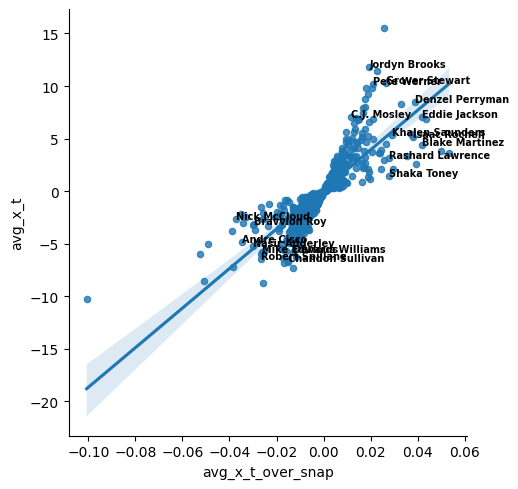

In [53]:
sns.lmplot(data=filtered_df, x='avg_x_t_over_snap', y='avg_x_t', scatter_kws={'s':20})

for index, name in enumerate(names_to_plot[0:-35]):
     plt.text(filtered_df.loc[name, 'avg_x_t_over_snap'], filtered_df.loc[name, 'avg_x_t'], s=name, horizontalalignment='left', color='black', weight='semibold', size=7)

plt.show()

In [45]:
def get_r_squared(df, col1, col2, filter=False):
    if filter:
        new_df = df[df['tackles_x'] >= 10]
    else:
        new_df = df
    new_df = new_df.dropna(axis=0, how='any', subset=[col1, col2])
    slope, intercept, r_value, p_value, std_err = linregress(new_df[col1], new_df[col2])
    print(f"({col1}, {col2}) R^2 (n={new_df.shape[0]})= {r_value**2}, R={r_value}")

In [56]:
get_r_squared(filtered_df, 'avg_x_t', 'diff_x_t')

(avg_x_t, diff_x_t) R^2 (n=485)= 0.13881857744512538, R=0.3725836516074281


In [57]:
get_r_squared(filtered_df, 'grades_tackle', 'diff_x_t')

(grades_tackle, diff_x_t) R^2 (n=485)= 0.07113010050421376, R=0.2667022694020689


In [58]:
get_r_squared(filtered_df, 'avg_x_t_over_snap', 'grades_tackle')

(avg_x_t_over_snap, grades_tackle) R^2 (n=485)= 0.008372226672140924, R=0.09149987252527145


In [59]:
get_r_squared(filtered_df, 'avg_x_t_over_snap', 'weight')

(avg_x_t_over_snap, weight) R^2 (n=485)= 0.03633066309618906, R=0.19060604160463818


In [60]:
get_r_squared(filtered_df, 'avg_x_t_over_snap', 'avg_x_t')

(avg_x_t_over_snap, avg_x_t) R^2 (n=485)= 0.6984495677810104, R=0.8357329524321812


In [61]:
get_r_squared(filtered_df, 'grades_tackle', 'tackles_y')

(grades_tackle, tackles_y) R^2 (n=485)= 0.06088918625131058, R=0.2467573428518604


In [62]:
get_r_squared(filtered_df, 'avg_x_t', 'tackles_y')

(avg_x_t, tackles_y) R^2 (n=485)= 0.09531119984931896, R=0.30872512021103654


In [63]:
get_r_squared(filtered_df, 'avg_x_t_over_snap', 'tackles_y')

(avg_x_t_over_snap, tackles_y) R^2 (n=485)= 0.020365021486790202, R=0.1427060667483699


In [64]:
get_r_squared(filtered_df, 'max_x_t', 'avg_x_t')

(max_x_t, avg_x_t) R^2 (n=485)= 0.05984600140977322, R=0.24463442400809665


In [65]:
get_r_squared(filtered_df, 'grades_tackle', 'missed_tackle_rate')

(grades_tackle, missed_tackle_rate) R^2 (n=484)= 0.5905370591861941, R=-0.7684640910193489


In [46]:
get_r_squared(filtered_df, 'avg_x_t', 'missed_tackle_rate')

(avg_x_t, missed_tackle_rate) R^2 (n=482)= 0.03170927938410457, R=-0.178070995347655


In [67]:
get_r_squared(filtered_df, 'avg_x_t', 'grades_tackle')

(avg_x_t, grades_tackle) R^2 (n=485)= 0.02173835094090268, R=0.1474393127388441


In [68]:
get_r_squared(filtered_df, 'avg_x_t', 'tackles_y')

(avg_x_t, tackles_y) R^2 (n=485)= 0.09531119984931896, R=0.30872512021103654


In [69]:
get_r_squared(filtered_df, 'avg_x_t', 'stops')

(avg_x_t, stops) R^2 (n=485)= 0.24505781303330706, R=0.4950331433685093


In [70]:
get_r_squared(filtered_df, 'avg_x_t', 'grades_run_defense')

(avg_x_t, grades_run_defense) R^2 (n=485)= 0.059973115850211416, R=0.24489409108880397


In [71]:
get_r_squared(filtered_df, 'avg_x_t', 'grades_pass_rush_defense')

(avg_x_t, grades_pass_rush_defense) R^2 (n=443)= 0.010593106428861729, R=0.102922817824143


In [73]:
get_r_squared(filtered_df, 'avg_x_t_over_snap', 'weight')

(avg_x_t_over_snap, weight) R^2 (n=485)= 0.03633066309618906, R=0.19060604160463818


In [74]:
get_r_squared(filtered_df, 'grades_tackle', 'weight')

(grades_tackle, weight) R^2 (n=485)= 0.02810466755108199, R=-0.1676444677019853


In [76]:
linebacker_list = ['OLB', 'ILB', 'MLB']
get_r_squared(filtered_df.query("officialPosition in @linebacker_list"), 'grades_tackle', 'missed_tackle_rate')
get_r_squared(filtered_df.query("officialPosition in @linebacker_list"), 'avg_x_t_over_snap', 'grades_tackle')

(grades_tackle, missed_tackle_rate) R^2 (n=138)= 0.7155566486543693, R=-0.8459058154749672
(avg_x_t_over_snap, grades_tackle) R^2 (n=138)= 0.013170712116757799, R=0.11476372299972583


In [269]:
safety_pos_list = ['SS', 'FS']
get_r_squared(filtered_df.query("officialPosition in @safety_pos_list"), 'grades_tackle', 'missed_tackle_rate')
get_r_squared(filtered_df.query("officialPosition in @safety_pos_list"), 'avg_x_t', 'grades_tackle')

(grades_tackle, missed_tackle_rate) R^2 (n=78)= 0.8981826254491845
(avg_x_t, grades_tackle) R^2 (n=78)= 0.01959623894435404


<Axes: >

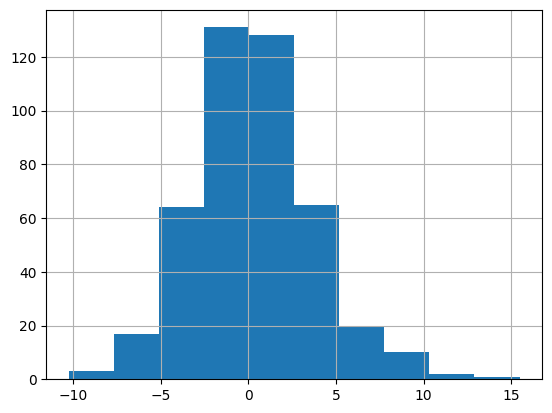

In [253]:
filtered_df.avg_x_t.hist()

In [254]:
scaled_avg = (filtered_df.avg_x_t - filtered_df.avg_x_t.min())/(filtered_df.avg_x_t.max() - filtered_df.avg_x_t.min())*100

In [263]:
filtered_df['scale_avg'] = scaled_avg

/var/folders/_w/4wq7jf9n3c74v00gxl_2v81r0000gn/T/ipykernel_28580/66927510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['scale_avg'] = scaled_avg


<Axes: >

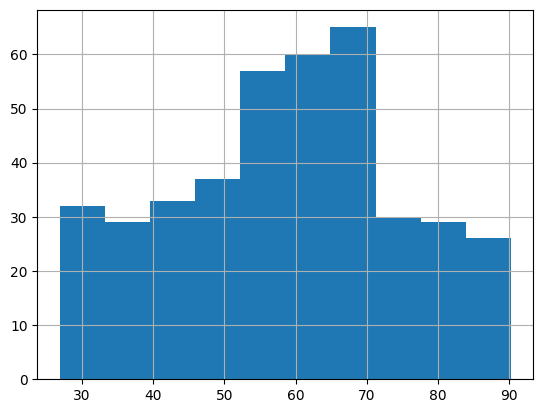

In [257]:
filtered_df.grades_tackle.hist()

In [261]:
filtered_df.head()

,max,xT,tackles_x,nflId,weight,officialPosition,max_x_t,avg_x_t,avg_ratio,missed_tackle_rate,grades_tackle,grades_pass_rush_defense,grades_run_defense,stops,tackles_y,total_pressures,grades_tackle_rank
displayName,,,,,,,,,,,,,,,,,
A'Shawn Robinson,33.005,11.669,15.000,43335.000,330.000,DT,-18.005,3.331,1.285,10.800,51.100,52.600,70.200,16.000,25.000,3.000,550.000
A.J. Parker,16.493,9.142,10.000,53957.000,178.000,CB,-6.493,0.858,1.094,0.000,85.500,58.500,58.700,3.000,11.000,0.000,18.000
A.J. Terrell,39.547,20.394,18.000,52424.000,190.000,CB,-21.547,-2.394,0.883,19.400,28.300,NaN,57.600,8.000,24.000,0.000,771.000
Aaron Donald,33.340,11.271,13.000,41239.000,280.000,DT,-20.340,1.729,1.153,5.900,64.900,90.300,76.900,26.000,26.000,28.000,356.000
Aaron Robinson,6.255,2.889,5.000,53500.000,193.000,CB,-1.255,2.111,1.731,0.000,80.000,NaN,70.400,1.000,5.000,0.000,53.000


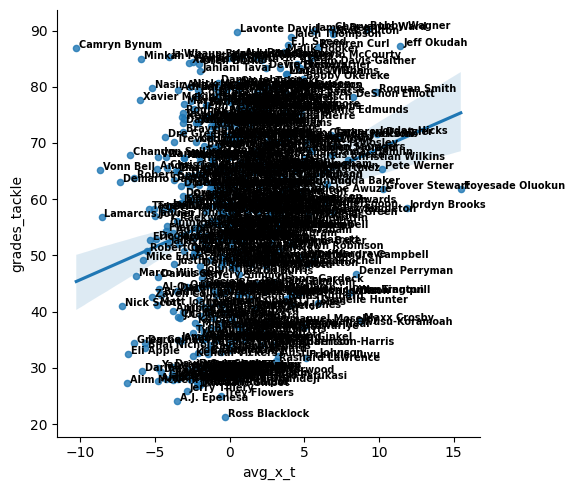

In [98]:
sns.lmplot(data=filtered_df, x='avg_x_t', y='grades_tackle', scatter_kws={'s':20})

for line in range(0,filtered_df.shape[0]):
     plt.text(filtered_df.avg_x_t[line]+0.2, filtered_df.grades_tackle[line], s=filtered_df.index.values[line], horizontalalignment='left', color='black', weight='semibold', size=7)

plt.show()

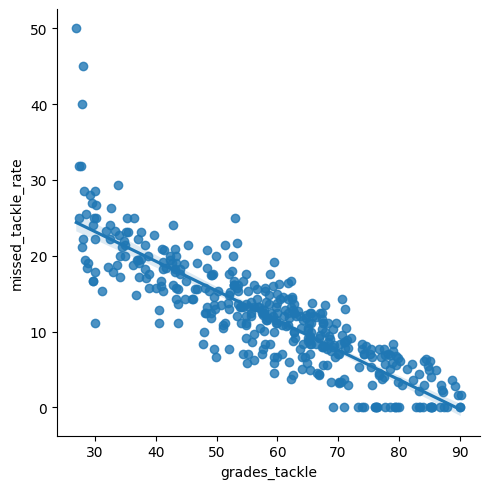

In [266]:
sns.lmplot(data=filtered_df, x='grades_tackle', y='missed_tackle_rate')

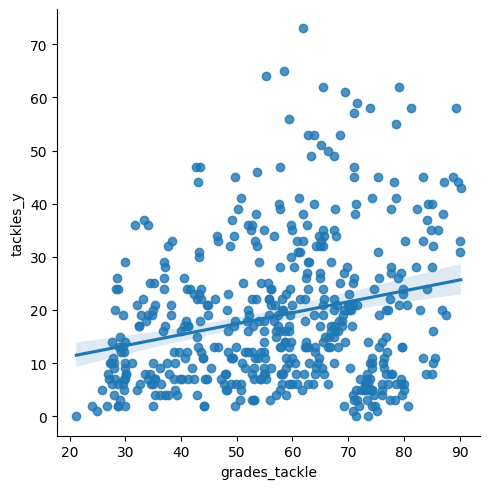

In [75]:
sns.lmplot(data=filtered_df, x='grades_tackle', y='tackles_y')

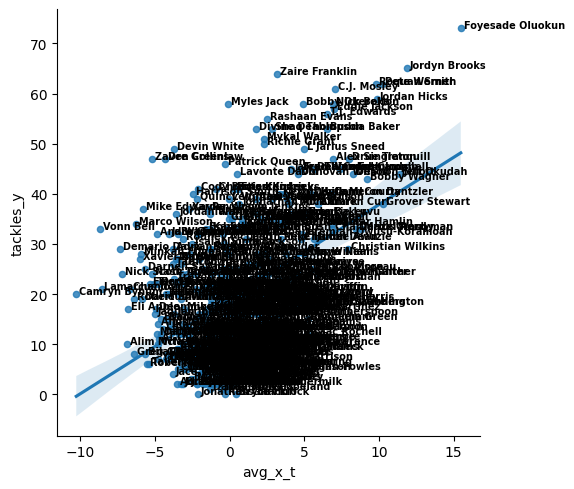

In [96]:
sns.lmplot(data=filtered_df, x='avg_x_t', y='tackles_y', scatter_kws={'s':20})

for line in range(0,filtered_df.shape[0]):
     plt.text(filtered_df.avg_x_t[line]+0.2, filtered_df.tackles_y[line], s=filtered_df.index.values[line], horizontalalignment='left', color='black', weight='semibold', size=7)

plt.show()

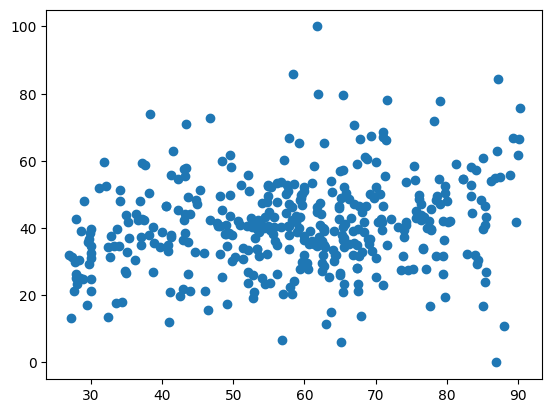

In [258]:
fig, ax = plt.subplots(1,1)

ax.scatter(filtered_df.grades_tackle, scaled_avg)

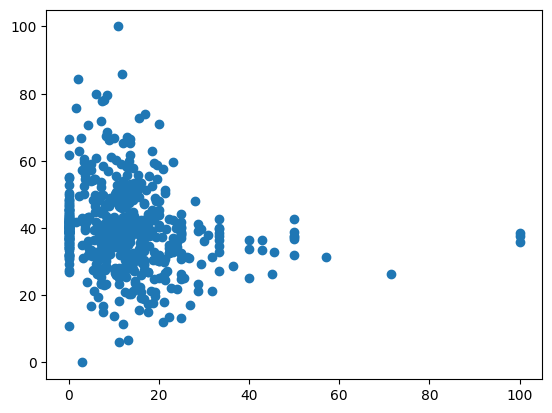

In [235]:
fig, ax = plt.subplots(1,1)
ax.scatter(filtered_df.missed_tackle_rate, scaled_avg)

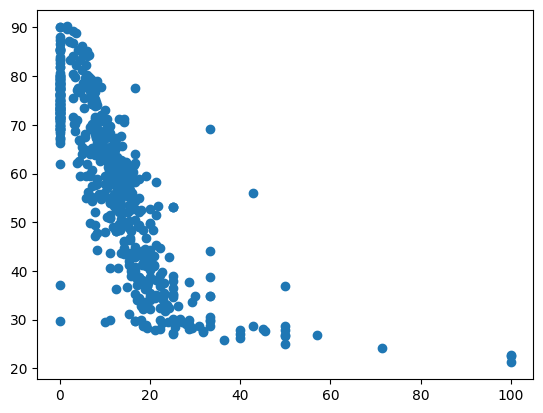

In [236]:
fig, ax = plt.subplots(1,1)
ax.scatter(filtered_df.missed_tackle_rate, filtered_df.grades_tackle)

In [184]:
all_df.dropna(subset=['grades_tackle', 'missed_tackle_rate']).sort_values('avg_x_t', ascending=False)

,max,xT,tackles_x,nflId,weight,officialPosition,max_x_t,avg_x_t,avg_ratio,missed_tackle_rate,grades_tackle,grades_pass_rush_defense,grades_run_defense,stops,tackles_y,total_pressures,grades_tackle_rank
displayName,,,,,,,,,,,,,,,,,
Foyesade Oluokun,97.095,43.517,59.000,46269.000,215.000,ILB,-38.095,15.483,1.356,10.900,61.800,74.000,54.600,40.000,73.000,9.000,401.000
Jordyn Brooks,107.604,49.149,61.000,52435.000,245.000,OLB,-46.604,11.851,1.241,11.800,58.400,63.400,69.900,35.000,65.000,5.000,447.000
Jeff Okudah,51.028,24.562,36.000,52411.000,200.000,CB,-15.028,11.438,1.466,2.000,87.200,NaN,81.900,14.000,44.000,0.000,11.000
Grover Stewart,57.056,20.714,31.000,44957.000,315.000,DT,-26.056,10.286,1.497,6.000,61.900,59.100,75.000,26.000,38.000,8.000,399.000
Pete Werner,85.534,38.779,49.000,53489.000,242.000,OLB,-36.534,10.221,1.264,8.400,65.400,57.300,62.600,34.000,62.000,4.000,342.000
Jordan Hicks,80.437,38.155,48.000,42427.000,236.000,ILB,-32.437,9.845,1.258,7.800,71.600,86.500,78.200,30.000,59.000,6.000,224.000
Roquan Smith,88.337,40.199,50.000,46077.000,230.000,ILB,-38.337,9.801,1.244,7.400,79.100,58.000,64.600,34.000,62.000,7.000,68.000
Bobby Wagner,66.931,28.770,38.000,38577.000,242.000,MLB,-28.931,9.230,1.321,1.600,90.200,71.100,86.500,22.000,43.000,7.000,2.000
Maxx Crosby,51.629,17.217,26.000,47889.000,255.000,DE,-25.629,8.783,1.510,17.000,38.300,80.200,88.900,34.000,33.000,32.000,659.000
